In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from faker import Faker
import random
from sklearn import linear_model
from sklearn import datasets

fake = Faker('pl_PL')

- Stwórz klasę student (imię, nazwisko, nr albumu, lista ocen, nieobecności)
- Klasa powinna mieć metodę, która wylicza średnią studenta
- Klasa powinna mieć metody które przedstawiają studenta w sposób:
- Student: Adam Nowak, index: 123456 ma średnią ocen:  3,65, jest studentem ze słabą/dobrą frekwencją
- Przyjmujemy że student z dobrą frekwencją to taki co opuścił maksymalnie 2 zajęcia
- Na podstawie średniej ocen dokonaj predykcji ilości dni opuszczonych przez studenta: jego oceny to: [3, 3, 3, 2]


In [2]:
class Student:
    def __init__(self, imie, nazwisko, nr_albumu, lista_ocen, nieobecnosci):
        self.imie         = imie
        self.nazwisko     = nazwisko
        self.nr_albumu    = nr_albumu
        self.lista_ocen    = lista_ocen
        self.nieobecnosci = nieobecnosci
    def srednia_ocen(self):
        srednia = np.mean(self.lista_ocen)
        return srednia
    def frekwencja(self):
        if self.nieobecnosci <= 2:
            return "z dobrą"
        else:
            return "ze słabą"
    def identyfikuj(self):
        print("%s %s, index: %s ma średnią ocen: %.1f, jest studentem %s frekwencją - '%i' dni" % 
              (self.imie, self.nazwisko, self.nr_albumu, self.srednia_ocen(), self.frekwencja(), self.nieobecnosci))

In [3]:
adam   = Student("Adam", "Nowak", "1234", [3, 4, 5, 2, 6], 2)
bartek = Student("Bartek", "Łoziński", "1235", [5, 4, 5, 5, 6], 3)

In [4]:
print(adam.srednia_ocen())

4.0


In [5]:
adam.identyfikuj()

Adam Nowak, index: 1234 ma średnią ocen: 4.0, jest studentem z dobrą frekwencją - '2' dni


In [6]:
bartek.identyfikuj()

Bartek Łoziński, index: 1235 ma średnią ocen: 5.0, jest studentem ze słabą frekwencją - '3' dni


## zadanie 11**

- Na podstawie funkcji 10
- Stwórz funkcję która przyjmuje parametr ilosc studentow
- Funkcja generuje studentow z losowymi danymi
- *Użyj paczki faker
- Funkcja zwraca listę obiektów


In [7]:
def generuj_studentow(ilosc):
    lista = list()
    print(type(lista))
    for _ in range(ilosc):
        imie = fake.name().split(' ')[-2]
        nazwisko = fake.name().split(' ')[-1]
        nr_indeksu = random.randint(1000,9999)
        oceny = [random.randint(2, 5) for x in range(random.randint(3, 6))]
        nieobecnosci = random.randint(0, (8 // np.mean(oceny)*3))
        lista.append(Student(imie, nazwisko, nr_indeksu, oceny, nieobecnosci)) 
    return lista


In [8]:
lista_studentow = generuj_studentow(100)

<class 'list'>


In [10]:
srednie_oceny = np.array([x.srednia_ocen() for x in lista_studentow])
dni_nieobecnosci = np.array([x.nieobecnosci for x in lista_studentow])

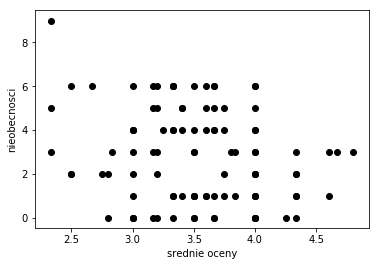

In [11]:
plt.scatter(srednie_oceny, dni_nieobecnosci,color='black')
plt.xlabel("srednie oceny")
plt.ylabel("nieobecnosci")
plt.show()

Deklarowanie funkcji regresji liniowej i wywołanie fit żeby nauczyć model

In [12]:
reg=linear_model.LinearRegression()
reg.fit(srednie_oceny.reshape(-1, 1), dni_nieobecnosci.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
m=reg.coef_[0]
b=reg.intercept_
print("slope=",m, "intercept=",b)

slope= [-0.88967736] intercept= [ 5.94833687]


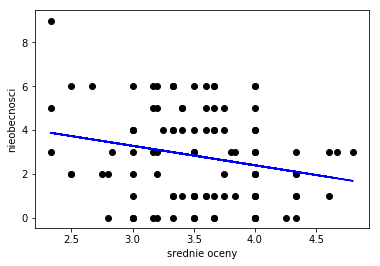

In [14]:
y_pred = reg.predict(srednie_oceny.reshape(-1,1))
plt.scatter(srednie_oceny, dni_nieobecnosci,color='black')
plt.plot(srednie_oceny, y_pred, 'b')
plt.xlabel("srednie oceny")
plt.ylabel("nieobecnosci")

## Zadanie 12

- Na podstawie zadań 10 i 11
- Stwórz klasę ClassInterpretation
- Klasa posiada metody:
- Zwracające dane odnośnie:
- Średniej,
- Mediany
- Metoda str wykonana na obiekcie będzie opisywać słownie grupę studentów
- Metoda float będzie zwracać średnią wszystkich studentów zaokrągloną do 2 miejsca po przecinku
- Dokonaj wizuazlizacji grupy studentow (zaleznosc wyniki ocen od ilosci opuszczonych zajec)
- Dokonaj predykcji dla studenta 


In [15]:
class ClassInterpretation:
    def __init__(self, lista_klasy):
        self.lista_klasy = lista_klasy
    def __str__(self):
        return "na liście wpisanych jest %i studentów. Średnia ocen wszystkich studentów to: %.1f. Mediana ze wszystkich średnich to: %i" % (len(self.lista_klasy), self.srednia(), self.mediana())
    def __float__(self):
        return float(round(self.srednia(), 2))
    def srednia(self):
        srednia = np.mean([student.srednia_ocen() for student in self.lista_klasy])
        return srednia
    def mediana(self):
        # mediana ze średniej oceny wszystkich studentów
        mediana = np.median([student.srednia_ocen() for student in self.lista_klasy])
        return mediana
    
        

In [16]:
classInterpreter = ClassInterpretation(lista_studentow)

In [17]:
print(classInterpreter)

na liście wpisanych jest 100 studentów. Średnia ocen wszystkich studentów to: 3.5. Mediana ze wszystkich średnich to: 3


In [18]:
float(classInterpreter)

3.53